In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('titanic')

# Check Data Types

In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
{col: df[col].nunique() for col in df if df[col].dtype == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [ ]:
df = df.astype(
    {
        'alive': 'category',
        'sex': 'category',
        'embarked': 'category',
        'who': 'category',
        'embark_town': 'category'
    }
)

In [ ]:
df.alive.cat.codes
df.sex.cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

# Check Correclation

In [ ]:
df.corr().style.background_gradient(cmap='Greens')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
df.drop(columns='alive', inplace=True)

# Describe

In [ ]:
df.describe(include=['category'])

,sex,embarked,class,who,deck,embark_town
count,891,889,891,891,203,889
unique,2,3,3,3,7,3
top,male,S,Third,man,C,Southampton
freq,577,644,491,537,59,644


In [ ]:
df.drop(columns='embark_town', inplace=True)

# Filling Missing Values

In [ ]:
df.isna().sum()

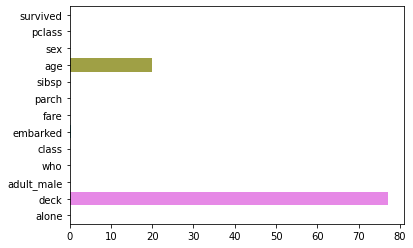

In [ ]:
sns.barplot(
    x = df.isna().sum() / df.shape[0] * 100,
    y = df.columns
)

In [ ]:
# Due to lots of number of missing values, this column was dropped
df.drop(columns='deck', inplace=True)

In [ ]:
df.corr()[['age']]

In [ ]:
df.age.fillna(df.age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [ ]:
sns.histplot(df.age.fillna(df.age.mean()))

In [ ]:
df.groupby(['adult_male']).age.mean()

adult_male
False    24.932458
True     33.173123
Name: age, dtype: float64